# Instalacja dependencji:
przed uruchomieniem, należy (jednorazowo) odkomentować i uruchomić poniższy kod.

Oprócz tego, należy umieścić w folderze 'dataset' folder z bazą danych treningowych i nazwać go 'faces-dataset-small' (ma to być folder zawierający wyłącznie obrazy), np: https://www.kaggle.com/datasets/tommykamaz/faces-dataset-small.

[funkcjonalność korzystania z różnych datasetów pod innymi nazwami jest w trakcie prac]

In [ ]:
# zakomentować po zakończeniu działania

#!python -m pip install --upgrade pip setuptools wheel
#!pip install -r req_dev.txt
#!pip install --index-url https://download.pytorch.org/whl/cu126 torch torchvision torchaudio

## Troubleshooting błędów:
jeśli po powyższej instalacji będą błędy, należy (jednorazowo) uruchomić poniższe:

In [ ]:
# zakomentować po zakończeniu działania

#!python -m pip uninstall -y torch torchvision torchaudio
#!python -m pip cache purge
#!python -m pip install --no-cache-dir --upgrade --index-url https://download.pytorch.org/whl/cu126 torch torchvision torchaudio

# Setup
Ustawienia parametrów autoenkodera i (opcjonalnie) nazwy pliku wyjściowego

In [2]:
from utilise_dataset import get_default_dataloader, get_singular_dataloader
from autoencoder_utils import train_autoencoder, show_autoencoder_reconstruction, save_autoencoder, load_autoencoder, show_autoencoder_partial_reconstructions, show_autoencoder_partial_reconstructions_scaled
from GAN_feature_scales_trainer import train_gan_scales, save_GAN_scales, load_GAN_scales
import my_filesystem as files

_compression_size=20 #16
_is_grayscale = True #True
_epochs=20 #100
_directory=['AutoencodersTesting'] #['AutoencodersTesting']
_filename=f'autoencoder{'_gray' if _is_grayscale else ''}_size{_compression_size}_{_epochs}ep.pth'

## Nadpisz _filename:
#_filename='autoencoder_gray_size8_100ep.pth'

# Funkcjonalność 1 - Generuj i pokaż działanie podstawowego autoenkodera

#### Wygeneruj i przetestuj podstawowy autoenkoder + zapisz; pokaż wyniki i opcjonalnie zapisz:

Epoch 1/20, Loss: 0.3988
Epoch 2/20, Loss: 0.2499
Epoch 3/20, Loss: 0.2141
Epoch 4/20, Loss: 0.2015
Epoch 5/20, Loss: 0.1960
Epoch 6/20, Loss: 0.1924
Epoch 7/20, Loss: 0.1881
Epoch 8/20, Loss: 0.1861
Epoch 9/20, Loss: 0.1833
Epoch 10/20, Loss: 0.1831
Epoch 11/20, Loss: 0.1791
Epoch 12/20, Loss: 0.1778
Epoch 13/20, Loss: 0.1765
Epoch 14/20, Loss: 0.1748
Epoch 15/20, Loss: 0.1723
Epoch 16/20, Loss: 0.1711
Epoch 17/20, Loss: 0.1691
Epoch 18/20, Loss: 0.1673
Epoch 19/20, Loss: 0.1664
Epoch 20/20, Loss: 0.1666


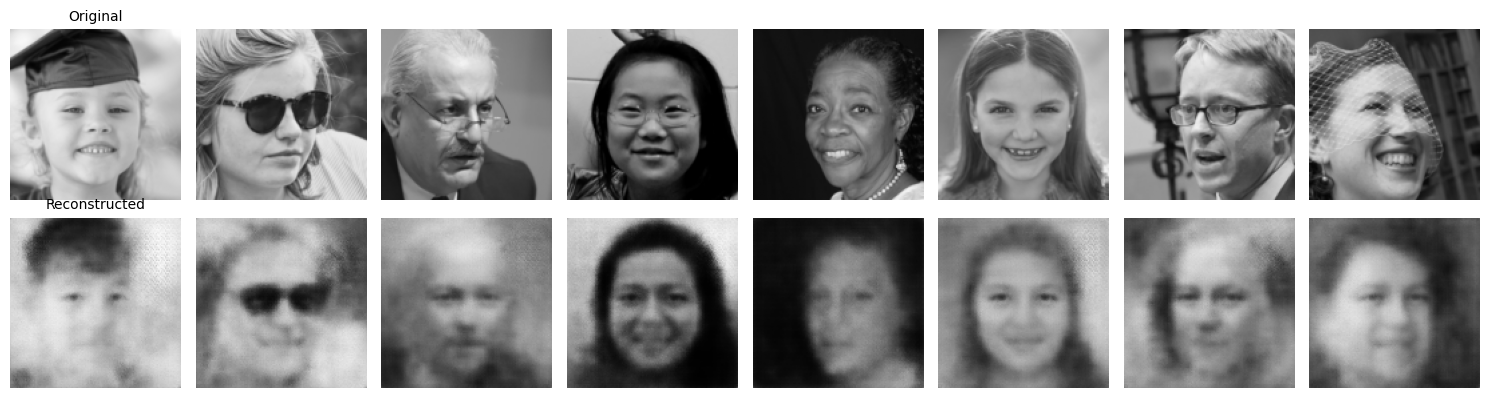

Feature vector size: torch.Size([32, 20])
Autoencoder saved to C:\Users\dawid\Documents\GitHub\GAN_distortion\middleman_folder\models\AutoencodersTesting\autoencoder_gray_size20_20ep.pth


In [5]:
def produce_autoencoder(compression_size=_compression_size, is_grayscale=_is_grayscale, epochs=_epochs, directory=_directory, filename=_filename) -> str:
    dataloader = get_default_dataloader(files.dir_DATASET_FACES, is_grayscale)
    autoencoder = train_autoencoder(dataloader, compression_size, epochs)
    show_autoencoder_reconstruction(autoencoder, dataloader)
    save_path = save_autoencoder(autoencoder, directory, filename, False)
    print(f"Autoencoder saved to {save_path}")
    return save_path


def use_autoencoder(load_path:str, howmany_plots=1):
    autoencoder = load_autoencoder(load_path)
    dataloader = get_default_dataloader(files.dir_DATASET_FACES, autoencoder.is_grayscale)

    show_autoencoder_reconstruction(autoencoder, dataloader, howmany_plots,
        save=True,
        img_save_folder=files.get_default_img_folder_of_model(load_path)
    )

## Wybierz własne parametry (niezalecane; lepiej zmodyfikować kod z części Setup powyżej):
#autoencoder_path = produce_autoencoder(compression_size=16, is_grayscale=True, epochs=10, directory=_directory, filename='autoencoder_gray_size16_10ep.pth')

## Korzystaj z parametrów ustawionych w części Setup
autoencoder_path = produce_autoencoder()

#### Wizualizacja działania istniejącego autoenkodera
Domyślnie - tego wygenerowanego powyżej;

W przypadku nie korzystania z kodu powyżej, zmodyfikować przedostatnią linię komórki poniżej

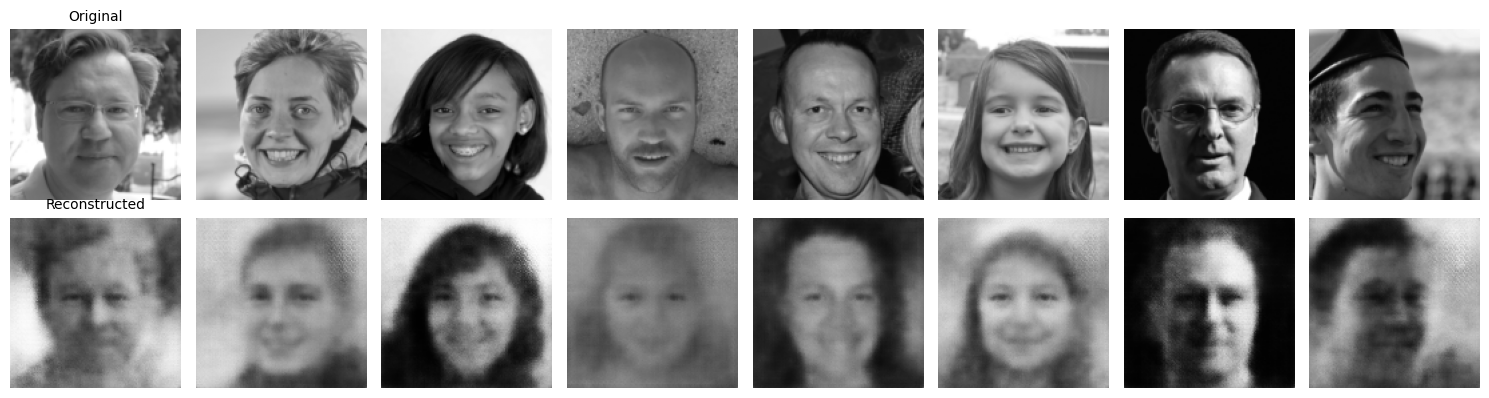

Feature vector size: torch.Size([32, 20])


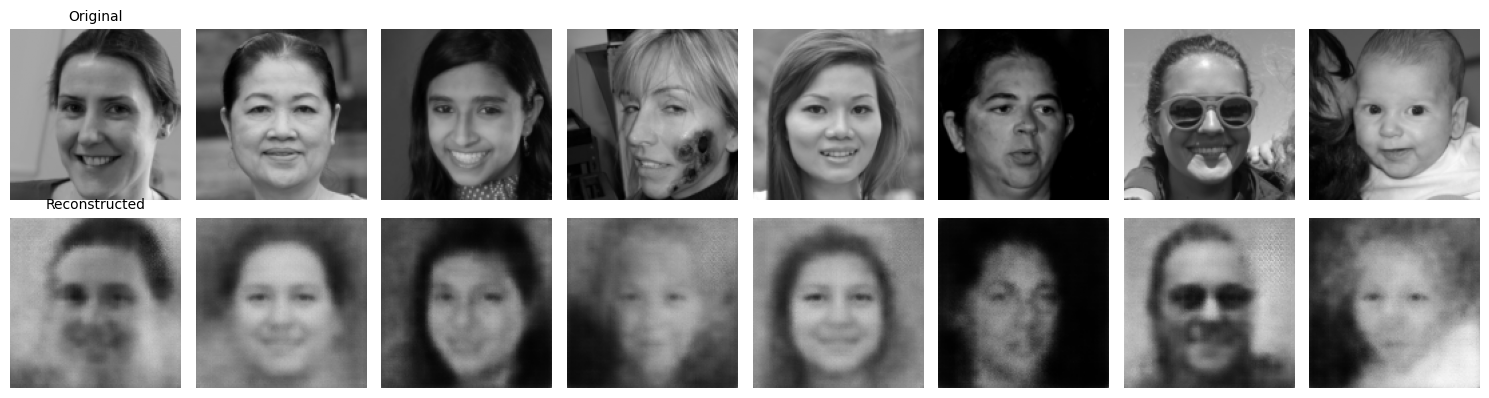

Feature vector size: torch.Size([32, 20])


In [6]:
## Odkomentuj jeśli chcesz ustawić własną ścieżkę - przez strukturę projektu, albo surową
## Option1:
#directory=[AutoencodersTesting, SubFolders, IfExist]
#filename='autoencoder_gray_size8_100ep.pth'
#autoencoder_path = files.get_model_path_from_directory(directory=directory, filename=filename)
## Option2:
#autoencoder_path = "path/to/autoencoder.pth"
#-------------------------------------------------------------------------------------------------

autoencoder_path = files.get_model_path_from_directory(directory=_directory, filename=_filename)
use_autoencoder(autoencoder_path, howmany_plots=2)

# Funkcjonalność 2 - Pokaż częściowe rekonstrukcje (pojedyncze cechy) podstawowego autoenkodera

torch.Size([20, 1, 128, 128])


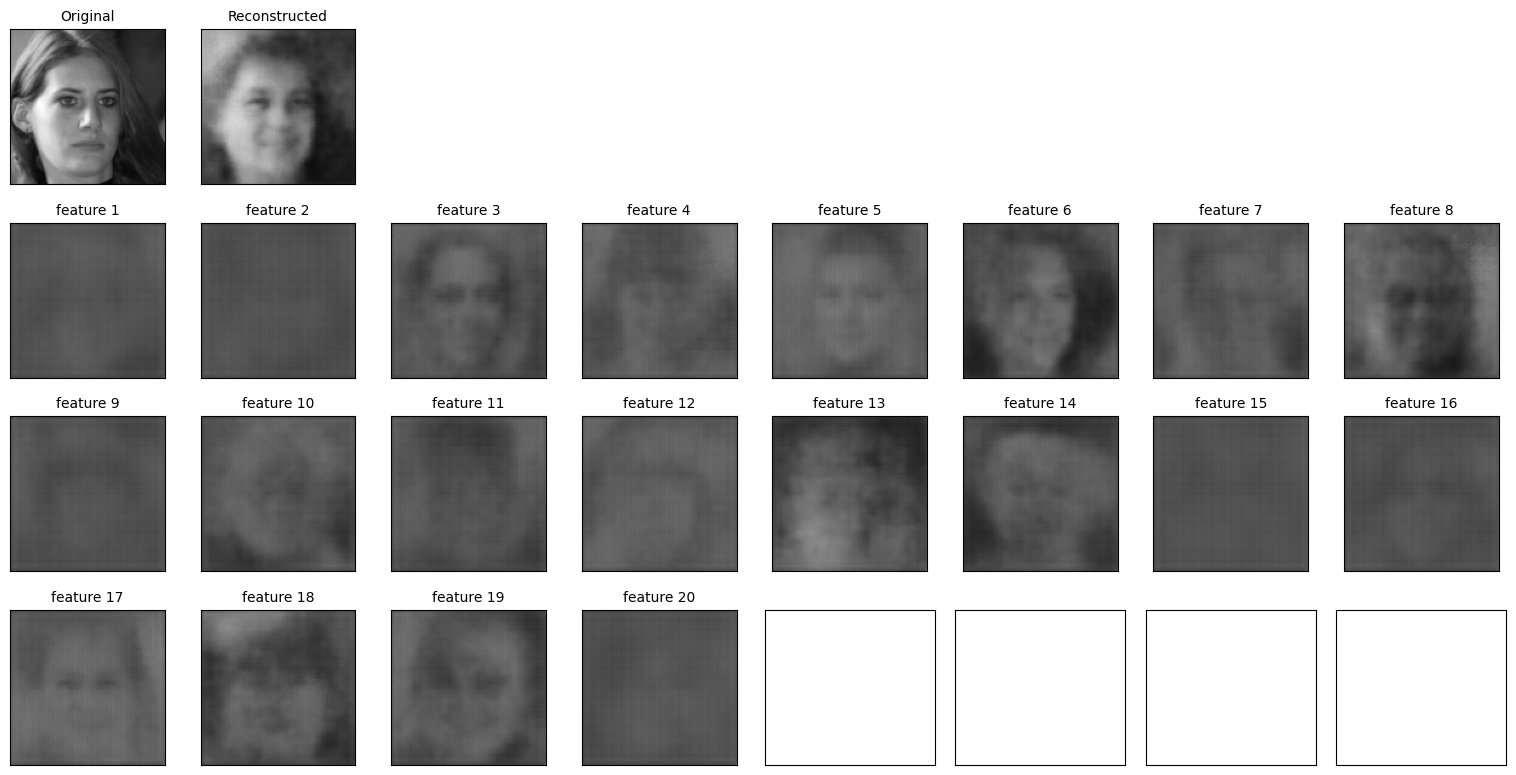

Feature vector size: torch.Size([1, 20])
torch.Size([20, 1, 128, 128])


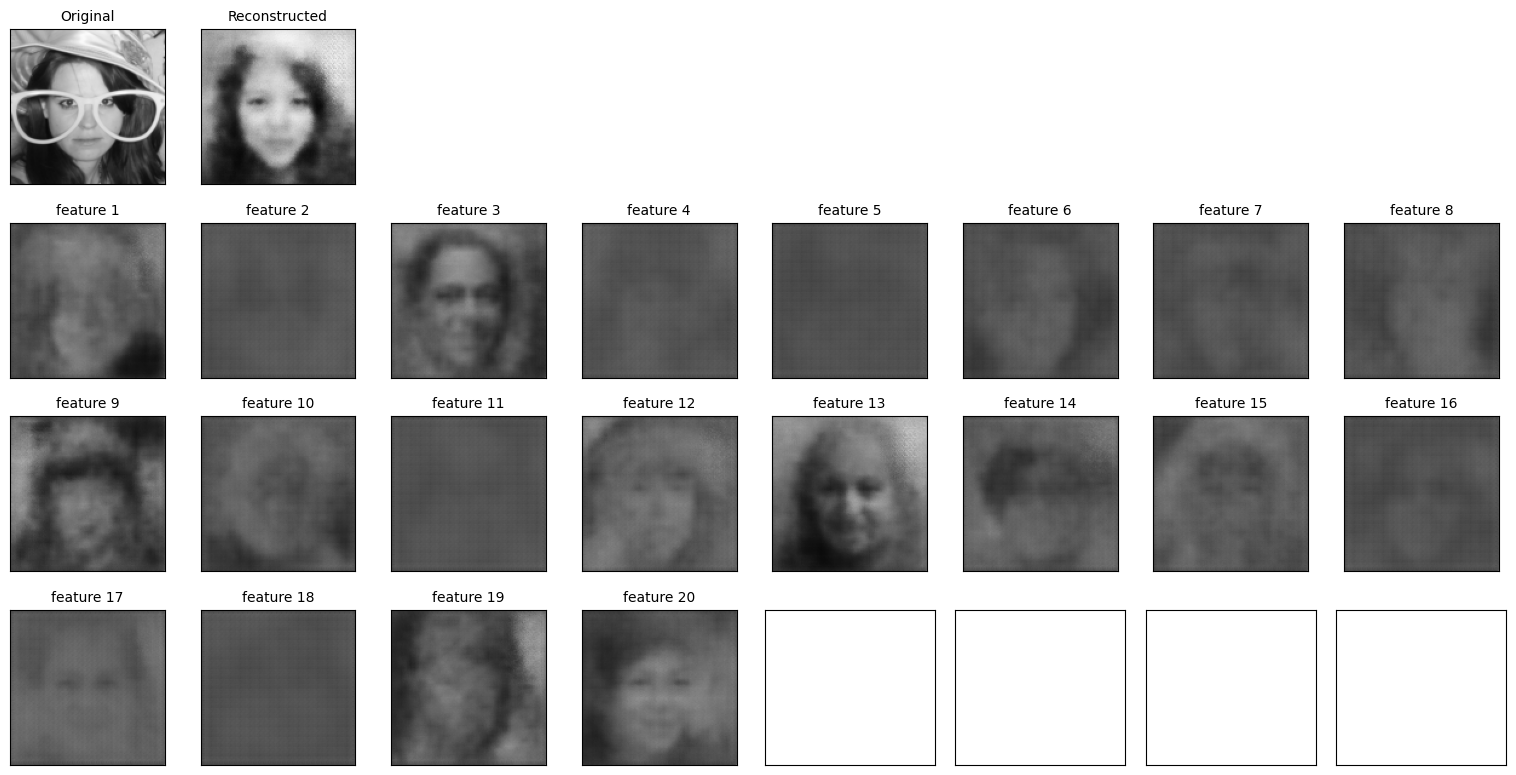

Feature vector size: torch.Size([1, 20])


In [8]:
## Odkomentuj jeśli chcesz ustawić własną ścieżkę - przez strukturę projektu, albo surową
## Option1:
#directory=[AutoencodersTesting, SubFolders, IfExist]
#filename='autoencoder_gray_size8_100ep.pth'
#autoencoder_path = files.get_model_path_from_directory(directory=directory, filename=filename)
## Option2:
#autoencoder_path = "path/to/autoencoder.pth"
#-------------------------------------------------------------------------------------------------

autoencoder_path = files.get_model_path_from_directory(_directory, _filename)
autoencoder = load_autoencoder(autoencoder_path)

show_autoencoder_partial_reconstructions(autoencoder, howmany_plots=2, save=True,
    img_save_folder=files.prepare_folder(files.join_path_unsupervised(files.dir_MID, 'IMG_TEST'))
)

# Funkcjonalność 3 - Trenuj model GAN na autoenkoderze i zapisz wytrenowane skale

Skale wytrenowane przez GAN zostają domyślnie zapisane do podfolderu o takiej samej nazwie jak autoenkoder, utworzonym w folderze z zapisanym autoenkoderem.

In [10]:
## Odkomentuj jeśli chcesz ustawić własną ścieżkę - przez strukturę projektu, albo surową
## Option1:
#directory=[AutoencodersTesting, SubFolders, IfExist]
#filename='autoencoder_gray_size8_100ep.pth'
#autoencoder_path = files.get_model_path_from_directory(directory=directory, filename=filename)
## Option2:
#autoencoder_path = "path/to/autoencoder.pth"
#-------------------------------------------------------------------------------------------------

autoencoder_path = files.get_model_path_from_directory(_directory, _filename)
autoencoder = load_autoencoder(autoencoder_path)
dataloader = get_default_dataloader(files.dir_DATASET_FACES, autoencoder.is_grayscale)

scales = train_gan_scales(autoencoder, dataloader, epochs=20)

save_path = save_GAN_scales(scales,
    scales_save_folder=files.get_default_img_folder_of_model(autoencoder_path),
    scales_filename=''
)

print(f"Scales were saved to {save_path}")

print(f"Scales tensor:{load_GAN_scales(save_path)}")

Epoch [1/20] | D: 1.3874 | G: 0.7432
trained scales (size=torch.Size([19])):
tensor([0.9953, 0.9992, 0.9919, 0.9990, 1.0004, 0.9982, 1.0026, 1.0060, 0.9982,
        0.9965, 0.9942, 0.9954, 0.9987, 0.9940, 1.0030, 0.9999, 0.9959, 1.0013,
        1.0088], device='cuda:0', requires_grad=True)
full scales: (size=torch.Size([20])):
tensor([1.0500, 0.9953, 0.9992, 0.9919, 0.9990, 1.0004, 0.9982, 1.0026, 1.0060,
        0.9982, 0.9965, 0.9942, 0.9954, 0.9987, 0.9940, 1.0030, 0.9999, 0.9959,
        1.0013, 1.0088], device='cuda:0', grad_fn=<CopySlices>)

Epoch [2/20] | D: 1.3868 | G: 0.7224
trained scales (size=torch.Size([19])):
tensor([0.9911, 1.0017, 0.9960, 0.9969, 1.0016, 0.9902, 0.9981, 1.0116, 0.9990,
        0.9961, 0.9906, 0.9937, 0.9995, 0.9919, 1.0048, 1.0006, 1.0005, 1.0028,
        1.0092], device='cuda:0', requires_grad=True)
full scales: (size=torch.Size([20])):
tensor([1.0500, 0.9911, 1.0017, 0.9960, 0.9969, 1.0016, 0.9902, 0.9981, 1.0116,
        0.9990, 0.9961, 0.9906, 0.993

# Funkcjonalność 4 - Pokaż i porównaj częściowe rekonstrukcje (cechy) podstawowego autoenkodera z autoenkoderem przeskalowanym przez GAN

torch.Size([20, 1, 128, 128])


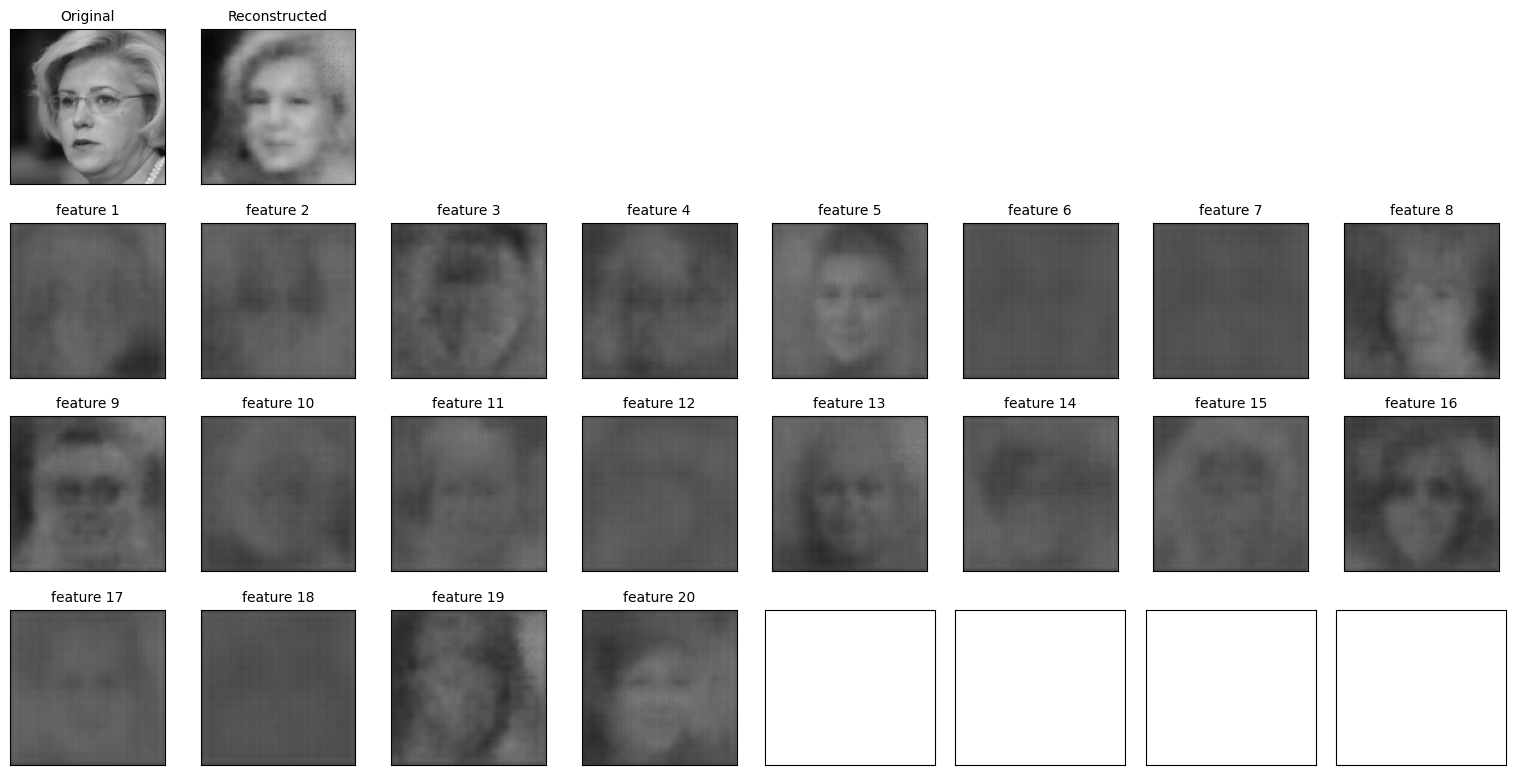

Feature vector size: torch.Size([1, 20])
torch.Size([20, 1, 128, 128])


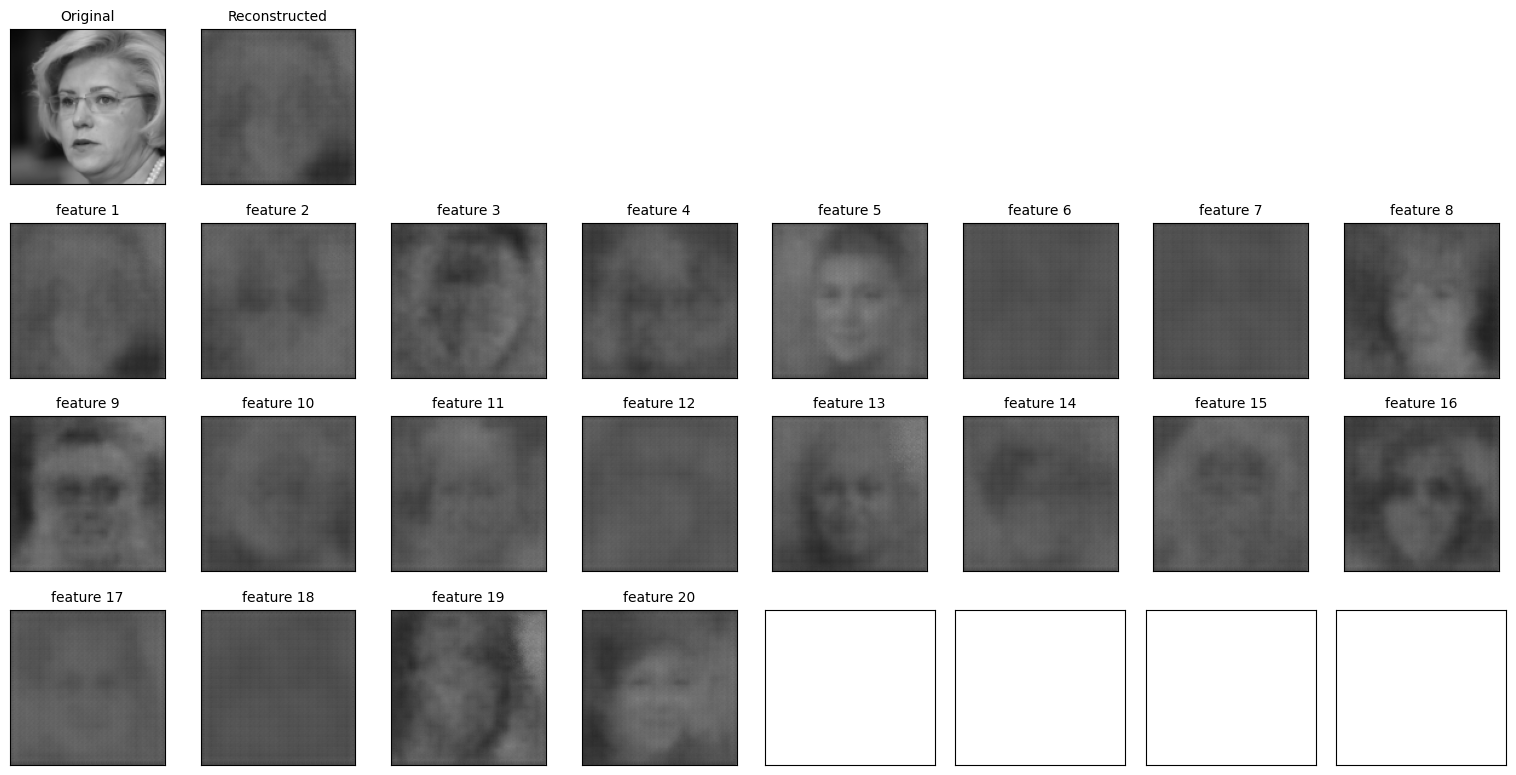

Feature vector size: torch.Size([1, 20])
torch.Size([20, 1, 128, 128])


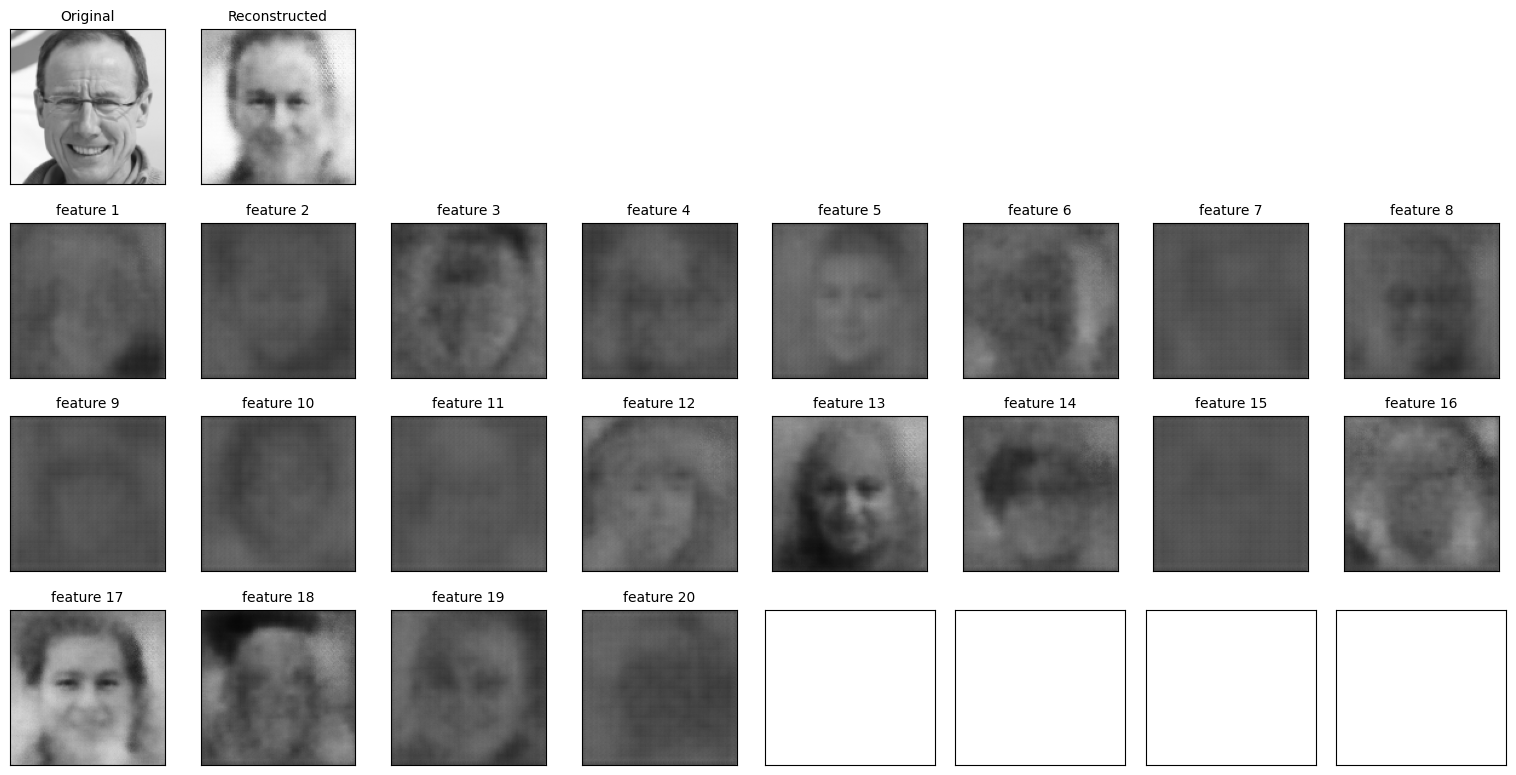

Feature vector size: torch.Size([1, 20])
torch.Size([20, 1, 128, 128])


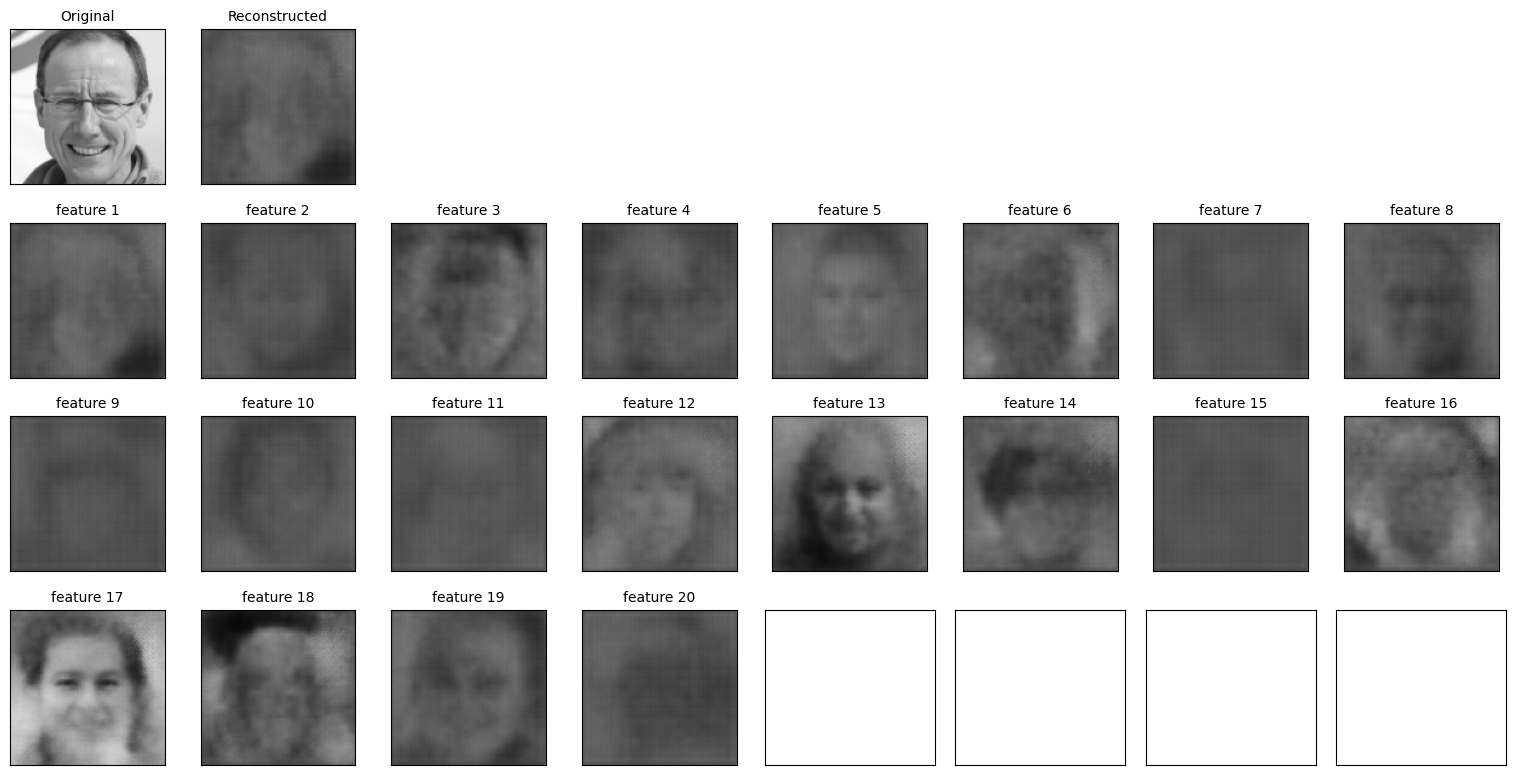

Feature vector size: torch.Size([1, 20])


In [13]:
## Odkomentuj jeśli chcesz ustawić własną ścieżkę - przez strukturę projektu, albo surową
## Option1:
#directory=[AutoencodersTesting, SubFolders, IfExist]
#scales_filename='scales_untitled_20260225-163112_.pth'
#_scales_folder = files.get_default_img_folder_of_model(files.get_model_path_from_directory(_directory, _filename))
#scales_save_path = files.join_path_unsupervised(_scales_folder, scales_filename)
## Option2:
#autoencoder_path = "path/to/autoencoder.pth"
#-------------------------------------------------------------------------------------------------

scales_save_path = save_path

autoencoder_path = files.get_model_path_from_directory(_directory, _filename)
autoencoder = load_autoencoder(autoencoder_path)
scales = load_GAN_scales(scales_save_path)

show_autoencoder_partial_reconstructions_scaled(autoencoder, scales=scales, howmany_plot_pairs=2, save=True,
    img_save_folder=files.prepare_folder(files.join_path_unsupervised(files.dir_MID, 'IMG_TEST'))
)

# Funkcjonalność 5 - Testowanie niezależności liniowej przestrzeni cech autoenkodera na zbiorach walidacyjnych
Funkcjonalność wymaga dodania folderu z datasetem walidacyjnym umieszczonym w folderze 'dataset';

Przykładowy dataset wspomniany w części "Instalacja dependencji" jest częścią większego datasetu (https://www.kaggle.com/datasets/gibi13/flickr-faces-hq-dataset-ffhq).

Do walidacji tego datasetu treningowego można wykorzystać  na przykład opisane poniżej fragmenty zbioru obrazów z dysku Google: https://drive.google.com/drive/folders/1tZUcXDBeOibC6jcMCtgRRz67pzrAHeHL:

folder: "00000" -> obrazy: "00100.png"-"00199.png"  (w kodzie poniżej określone jako: 'faces_dataset_small_eval_00100');

folder: "01000" -> obrazy: "01000.png"-"01099.png"  (w kodzie poniżej określone jako: 'faces_dataset_small_eval_01000').

In [7]:
from check_linear_independance_AE import check_all_partial_images_from_directory
#load_path = files.get_model_path_from_directory(['AutoencodersTesting'], filename='autoencoder_gray_size16_100ep.pth')

load_path = files.get_model_path_from_directory(_directory, filename=_filename)
autoencoder = load_autoencoder(load_path)
print(f"Dla sprawdzenia niezależności liniowej, każdy obraz powinien mieć rank=liczbie cech (równe wartości _compression_size={_compression_size}).")


eval_dataset_folders = ['faces_dataset_small_eval_00100', 'faces_dataset_small_eval_01000']
quiet = True
print("Calculating ranks...")

for eval_dataset_folder in eval_dataset_folders:
    eval_dataset_path = files.join_path_unsupervised(files.dir_DATASET, eval_dataset_folder)

    ranks_array, mean_rank, std_rank = check_all_partial_images_from_directory(autoencoder, eval_dataset_path, quiet)

    print(f"\nDla sprawdzenia niezależności liniowej, każdy obraz powinien mieć rank=liczbie cech (równe wartości _compression_size={_compression_size}).")

    print("Vector of image ranks:", ranks_array)
    print("Mean rank:", mean_rank)
    print("Std rank:", std_rank)

Dla sprawdzenia niezależności liniowej, każdy obraz powinien mieć rank=liczbie cech (równe wartości _compression_size=20).
Calculating ranks...

Dla sprawdzenia niezależności liniowej, każdy obraz powinien mieć rank=liczbie cech (równe wartości _compression_size=20).
Vector of image ranks: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
Mean rank: 20.0
Std rank: 0.0

Dla sprawdzenia niezależności liniowej, każdy obraz powinien mieć rank=liczbie cech (równe wartości _compression_size=20).
Vector of image ranks: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.